In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv("users.dat", sep="::", header=None)

movies = pd.read_csv("movies.dat", sep="::", header=None)

ratings = pd.read_csv("ratings.dat", sep="::", header=None)

print(users.info())
print(movies.info())
print(ratings.info())

c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (se

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
0    6040 non-null int64
1    6040 non-null object
2    6040 non-null int64
3    6040 non-null int64
4    6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
0    3883 non-null int64
1    3883 non-null object
2    3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
0    1000209 non-null int64
1    1000209 non-null int64
2    1000209 non-null int64
3    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
None


In [3]:
usersHeader = ["userID", "gender", "age", "occupation", "zipCode"]

# age to float num (mean)  and to factor

moviesHeader_init = ["movieID", "title", "genres"]
moviesHeader = ["movieID", "year", "title", "genres"]
# genres must be ONE HOT encoding



ratingsHeader = ["userID", "movieID", "rating", "time"]

In [31]:
movies.columns=moviesHeader_init
movies.head()
procMovies=pd.DataFrame(data={'movieID':movies['movieID']})
x =movies['title'].str.extract('(.*)\((\d{4})\)$')
procMovies['title']=x[0]
procMovies['year']=x[1]
procMovies['genres']=movies['genres'].str.split('|')
procMovies['howManyGenres']=procMovies['genres'].str.len()
print(procMovies.head())

procMovies1Hot=procMovies.copy()
procMovies1Hot=procMovies1Hot.drop('genres', 1).join(pd.get_dummies(pd.DataFrame(procMovies1Hot['genres'].tolist()).stack()).astype(int).sum(level=0))
print(procMovies1Hot.head())


procMoviesUniformHot=procMovies1Hot.copy()
procMoviesUniformHot.iloc[:,4:]=procMoviesUniformHot.iloc[:,4:].div(procMoviesUniformHot['howManyGenres'],axis=0)
print(procMoviesUniformHot.head())

   movieID                         title  year  \
0        1                    Toy Story   1995   
1        2                      Jumanji   1995   
2        3             Grumpier Old Men   1995   
3        4            Waiting to Exhale   1995   
4        5  Father of the Bride Part II   1995   

                             genres  howManyGenres  
0   [Animation, Children's, Comedy]              3  
1  [Adventure, Children's, Fantasy]              3  
2                 [Comedy, Romance]              2  
3                   [Comedy, Drama]              2  
4                          [Comedy]              1  
   movieID                         title  year  howManyGenres  Action  \
0        1                    Toy Story   1995              3       0   
1        2                      Jumanji   1995              3       0   
2        3             Grumpier Old Men   1995              2       0   
3        4            Waiting to Exhale   1995              2       0   
4        5  Fath

c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


howManyGenres
1    2025
2    1322
3     421
4     100
5      14
6       1
dtype: int64


,movieID,title,year,genres,howManyGenres
1187,1205,"Transformers: The Movie, The",1986,"[Action, Animation, Children's, Sci-Fi, Thrill...",6
554,558,"Pagemaster, The",1994,"[Action, Adventure, Animation, Children's, Fan...",5
1197,1215,Army of Darkness,1993,"[Action, Adventure, Comedy, Horror, Sci-Fi]",5
2012,2081,"Little Mermaid, The",1989,"[Animation, Children's, Comedy, Musical, Romance]",5
69,70,From Dusk Till Dawn,1996,"[Action, Comedy, Crime, Horror, Thriller]",5


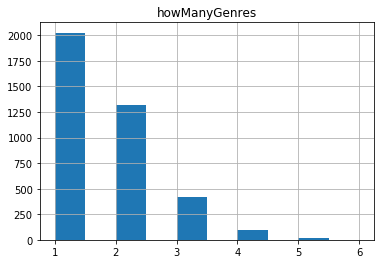

In [39]:
# how many genres does a movie have?
g=procMovies.groupby('howManyGenres').size()
print(g)
procMovies.hist(column='howManyGenres')
# movies with the greates number of genres
procMovies.sort_values('howManyGenres',ascending=False).head()

      movieID                                              title  year  \
3063     3132                                   Daddy Long Legs   1919   
2754     2823  Spiders, The (Die Spinnen, 1. Teil: Der Golden...  1919   
2752     2821                                   Male and Female   1919   
3240     3309                                     Dog's Life, A   1920   
3162     3231                                      Saphead, The   1920   

                  genres  howManyGenres  
3063            [Comedy]              1  
2754     [Action, Drama]              2  
2752  [Adventure, Drama]              2  
3240            [Comedy]              1  
3162            [Comedy]              1  
      movieID               title  year             genres  howManyGenres
3882     3952     Contender, The   2000  [Drama, Thriller]              2
3528     3597            Whipped   2000           [Comedy]              1
3577     3646  Big Momma's House   2000           [Comedy]              1
3170   

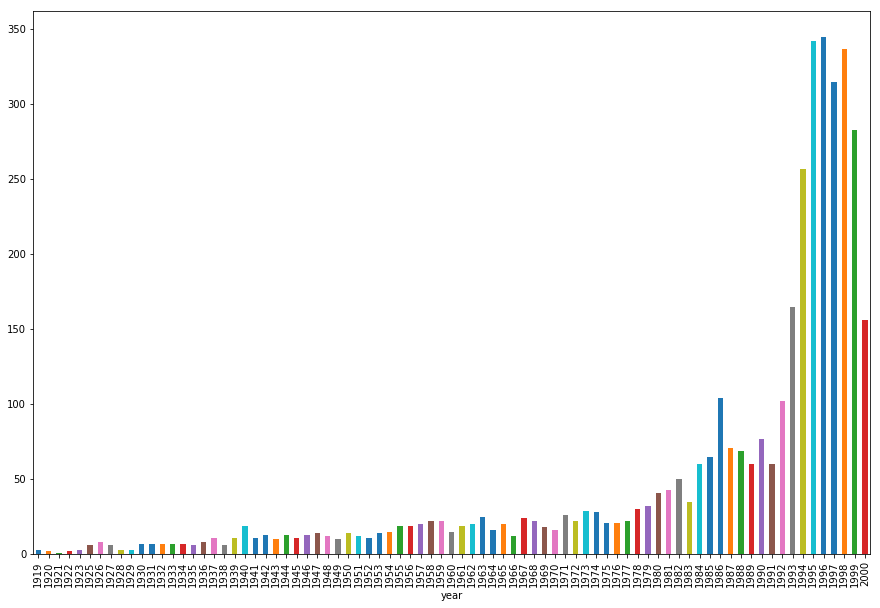

In [65]:
# oldest movies
print(procMovies.sort_values('year').head())
# newest movies
print(procMovies.sort_values('year',ascending=False).head())
# how many movies for each year do we have?
g=procMovies.groupby('year').size()
g.plot.bar(figsize=(15,10))


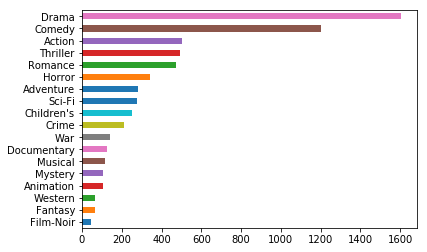

In [78]:
# in how many movies does each genre appear?
g=procMovies1Hot.iloc[:,4:].sum().sort_values()
g.plot.barh()

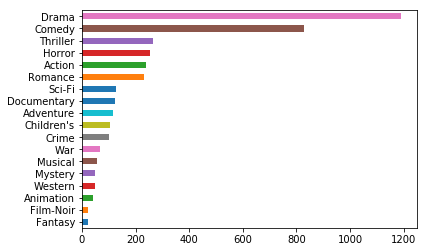

In [79]:
# how much is used a genre?
# the usage og a genre is a value in [0,1]
# if a movie has both thriller and action then thriller is used for 0.5 and action for 0.5
# if a movie has only thriller then thriller is used for 1
g=procMoviesUniformHot.iloc[:,4:].sum().sort_values()
g.plot.barh()
## for drama and comedy the plot is almost the same as before and they are at the top
## but this does not happen for action, thriller, romance
## the difference between the two plots is that for the second one we are giving less weight to a genre if there are also other genres
## so it seems that movies with drama or comedy as genre has only 1 genre
## instead movies with action, thriller, romance as genre has more than 1 genre

howManyGenres,1,2,3,4,5,6,genre,wmHowManyGenre
Documentary,116,11,0,0,0,0,Documentary,1.086614
Drama,843,573,155,30,2,0,Drama,1.611978
Horror,178,120,35,7,3,0,Horror,1.650146
Comedy,521,501,134,36,8,0,Comedy,1.757500
Western,33,18,15,2,0,0,Western,1.794118
Thriller,101,224,121,42,3,1,Thriller,2.237805
Romance,40,302,100,24,5,0,Romance,2.261146
Film-Noir,10,15,16,3,0,0,Film-Noir,2.272727
War,12,78,41,8,3,1,War,2.405594
Crime,26,99,60,25,1,0,Crime,2.412322


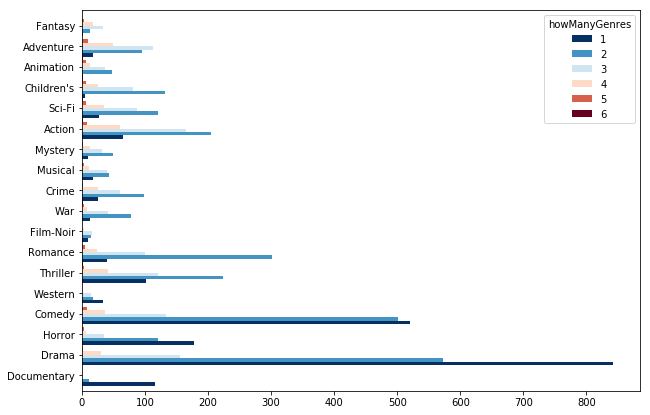

In [189]:
# let's verify the reasoning written above:
## comedy and drama are usually the unique genre of the movie
## instead action,thriller, romance are mixed with other genres
genres=procMovies1Hot.columns[4:].tolist() # get list of genres
# group by howManyGenres and count how many movies for each genre
g=procMovies1Hot.groupby('howManyGenres')[genres].sum()
t=g.transpose() # a genre for each row
# each genre is used in movies with 1,2,.. genres,
## column 1 has how many movies used the given genre has unique genre,
## column 2 has how many movies used the given genre together with another genre
## column N has how many movies usd the given genre together with N-1 genres

# make a dataframe with columns: genre, howManyGenres, numberOfMovies
t['genre']=t.index
q=t.melt(id_vars='genre',value_name='numberOfMovies')
q['howManyGenres']=q['howManyGenres'].astype(int) # howManyGenres is of type int
# for each genre compute weighted mean of howManyGenre with numberOfMovies as weight 
w=q.groupby('genre').agg(lambda x: np.average(x['howManyGenres'],weights=x['numberOfMovies'])).iloc[:,1]
t['wmHowManyGenre']=w
t=t.sort_values('wmHowManyGenre')
t.iloc[:,0:6].plot.barh(figsize=(10,7),width=1,cmap='RdBu_r')
t